In [1]:
import sys 
import os 
import numpy as np
import pandas as pd
import sklearn as sk
import re
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn import metrics as metrics_sk
from sklearn.metrics import precision_recall_curve
from scipy.stats import ks_2samp
from IPython.display import Image, display_svg, SVG

In [2]:
from keras import layers, Sequential
from keras.layers import Input, Add, Dropout, Dense, Activation, ZeroPadding1D, ZeroPadding2D, BatchNormalization, Flatten, Conv1D, AveragePooling1D, MaxPooling1D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras import metrics
from keras import optimizers
from keras import regularizers
import pydot
from tensorflow.keras import regularizers
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline
import tensorflow as tf
import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

Using TensorFlow backend.
C:\Anaconda3\envs\benedito_deep\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\envs\benedito_deep\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\envs\benedito_deep\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\envs\benedito_deep\lib\site-packages\tensorflo

In [3]:
from keras.backend import sigmoid
def swish(x, beta = 1):
    return (x * sigmoid(beta * x))

In [4]:
from keras.backend import log
def inv_h_sin(x, theta = 1):
    if x == 0:
        return x
    else:
        return log(theta*x + ((theta*x)**2 + 1)**0.5)/theta

In [5]:
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation
get_custom_objects().update({'swish': Activation(swish)})
get_custom_objects().update({'inv_h_sin': Activation(inv_h_sin)})

In [6]:
os.getcwd()

'C:\\Users\\Benedito'

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
os.chdir("C:/Users/Benedito/Desktop/MECAI/Introdução a Estatistica/MVP")

In [9]:
os.getcwd()

'C:\\Users\\Benedito\\Desktop\\MECAI\\Introdução a Estatistica\\MVP'

In [10]:
df = pd.read_csv("modelling_table_8.csv")

In [11]:
data = df

In [13]:
data.head()

,Unnamed: 0,SK_ID_CURR,TARGET,mean_knn_target,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,CODE_GENDER_M,NAME_CONTRACT_TYPE_Revolving loans,NAME_EDUCATION_TYPE_Higher education,NAME_FAMILY_STATUS_Married,OCCUPATION_TYPE_Sales staff,MAX(previous.NFLAG_LAST_APPL_IN_DAY),FLAG_EMAIL,REGION_RATING_CLIENT_W_CITY_2,FLAG_OWN_CAR_Y,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_Lower secondary,MEDIAN(previous.NFLAG_INSURED_ON_APPROVAL),delinquency_12_24_mths_microloan_bureau,FLAG_DOCUMENT_13,WALLSMATERIAL_MODE_Monolithic,FLAG_PHONE,NAME_INCOME_TYPE_State servant,NAME_TYPE_SUITE_Other_A,REG_REGION_NOT_WORK_REGION,delinquency_6_12_mths_microloan_bureau,FLAG_WORK_PHONE,NAME_TYPE_SUITE_Family,FLAG_DOCUMENT_3,NAME_TYPE_SUITE_Group of people,CODE_GENDER_XNA,NAME_INCOME_TYPE_Student,credit_income_cluster_4,YEARS_BEGINEXPLUATATION_MEDI,NAME_HOUSING_TYPE_Office apartment,"WALLSMATERIAL_MODE_Stone, brick",amt_credit_sum_overdue_microloan_bureau,WALLSMATERIAL_MODE_Panel,credit_income_ratio_monotonic,remaining_pmts_monotonic,missing_rate_monotonic,days_phone_change_over_gap_amt_installment_monotonic,YEARS_BUILD_MODE_monotonic,ENTRANCES_AVG_monotonic,DAYS_ID_PUBLISH_monotonic,FLOORSMIN_AVG_monotonic,APARTMENTS_MEDI_monotonic,LIVINGAREA_MODE_monotonic,YEARS_BEGINEXPLUATATION_AVG_monotonic,income_over_credit_monotonic,days_phone_change_times_gap_days_installment_monotonic,FLOORSMIN_MEDI_monotonic,OWN_CAR_AGE_monotonic,AMT_GOODS_PRICE_monotonic,DAYS_REGISTRATION_monotonic,FLOORSMIN_MODE_monotonic,FLOORSMAX_AVG_monotonic,LANDAREA_AVG_transformed,LANDAREA_MEDI_transformed,cnt_appl_previous_transformed,MAX(previous.DAYS_DECISION)_transformed,MAX(previous.HOUR_APPR_PROCESS_START)_transformed,MEAN(previous.NFLAG_LAST_APPL_IN_DAY)_transformed,MIN(previous.HOUR_APPR_PROCESS_START)_transformed,MEAN(previous.AMT_CREDIT)_transformed,avg_amt_application_previous_transformed,SUM(previous.AMT_GOODS_PRICE)_transformed,SUM(previous.DAYS_FIRST_DRAWING)_transformed,MAX(previous.DAYS_FIRST_DRAWING)_transformed,SUM(previous.DAYS_TERMINATION)_transformed,SUM(previous.DAYS_FIRST_DUE)_transformed,MEAN(previous.DAYS_TERMINATION)_transformed,MEAN(previous.DAYS_LAST_DUE_1ST_VERSION)_transformed,SUM(previous.CNT_PAYMENT)_transformed,MAX(previous.CNT_PAYMENT)_transformed,max_cnt_payment_previous_transformed,avg_pos_cash_cnt_installment_previous_transformed,avg_pos_cash_cnt_installment_future_previous_transformed,MEDIAN(previous.CNT_PAYMENT)_transformed,MEDIAN(previous.AMT_CREDIT)_transformed,MEDIAN(previous.AMT_APPLICATION)_transformed,gap_avg_application_credit_previous_transformed,COUNT(bureau)_transformed,MIN(bureau.DAYS_CREDIT)_transformed,MEDIAN(bureau.DAYS_CREDIT_UPDATE)_transformed,MAX(bureau.DAYS_CREDIT_UPDATE)_transformed,MEAN(bureau.AMT_CREDIT_SUM)_transformed,SUM(bureau.DAYS_CREDIT_ENDDATE)_transformed,MIN(bureau.DAYS_CREDIT_ENDDATE)_transformed,NONLIVINGAREA_MEDI_transformed,STD(previous.AMT_CREDIT)_transformed,MEAN(bureau.DAYS_ENDDATE_FACT)_transformed,STD(bureau.DAYS_CREDIT)_transformed,STD(previous.AMT_GOODS_PRICE)_transformed,cnt_contracts_bureau_transformed,STD(previous.CNT_PAYMENT)_transformed,amt_paid_down_transformed,SUM(previous.RATE_DOWN_PAYMENT)_transformed,MEAN(previous.AMT_DOWN_PAYMENT)_transformed,MAX(previous.AMT_DOWN_PAYMENT)_transformed,MIN(previous.CNT_PAYMENT)_transformed,SKEW(previous.AMT_APPLICATION)_transformed,SKEW(bureau.DAYS_CREDIT)_transformed,SKEW(previous.DAYS_DECISION)_transformed,SUM(bureau.AMT_CREDIT_SUM_DEBT)_transformed,tot_debt_lim_ratio_transformed,MAX(bureau.AMT_CREDIT_SUM_DEBT)_transformed,cnt_seller_electronics_previous_transformed,STD(bureau.DAYS_ENDDATE_FACT)_transformed,cnt_cash_previous_transformed,MEDIAN(previous.RATE_DOWN_PAYMENT)_transformed,amt_credit_sum_consumer_credit_bureau_transformed,cnt_yield_low_normal_previous_transformed,MIN(previous.AMT_APPLICATION)_transformed,cnt_product_xsell_previous_transformed,cnt_portfolio_cash_previous_transformed,OBS_30_CNT_SOCIAL_CIRCLE_transformed,cnt_channel_contac

In [14]:
data.fillna(0, inplace=True)

In [15]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [16]:
data.set_index('SK_ID_CURR', inplace=True)

In [17]:
data = data.replace([np.inf, -np.inf], 0)

In [18]:
data.head()

,TARGET,mean_knn_target,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,CODE_GENDER_M,NAME_CONTRACT_TYPE_Revolving loans,NAME_EDUCATION_TYPE_Higher education,NAME_FAMILY_STATUS_Married,OCCUPATION_TYPE_Sales staff,MAX(previous.NFLAG_LAST_APPL_IN_DAY),FLAG_EMAIL,REGION_RATING_CLIENT_W_CITY_2,FLAG_OWN_CAR_Y,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_Lower secondary,MEDIAN(previous.NFLAG_INSURED_ON_APPROVAL),delinquency_12_24_mths_microloan_bureau,FLAG_DOCUMENT_13,WALLSMATERIAL_MODE_Monolithic,FLAG_PHONE,NAME_INCOME_TYPE_State servant,NAME_TYPE_SUITE_Other_A,REG_REGION_NOT_WORK_REGION,delinquency_6_12_mths_microloan_bureau,FLAG_WORK_PHONE,NAME_TYPE_SUITE_Family,FLAG_DOCUMENT_3,NAME_TYPE_SUITE_Group of people,CODE_GENDER_XNA,NAME_INCOME_TYPE_Student,credit_income_cluster_4,YEARS_BEGINEXPLUATATION_MEDI,NAME_HOUSING_TYPE_Office apartment,"WALLSMATERIAL_MODE_Stone, brick",amt_credit_sum_overdue_microloan_bureau,WALLSMATERIAL_MODE_Panel,credit_income_ratio_monotonic,remaining_pmts_monotonic,missing_rate_monotonic,days_phone_change_over_gap_amt_installment_monotonic,YEARS_BUILD_MODE_monotonic,ENTRANCES_AVG_monotonic,DAYS_ID_PUBLISH_monotonic,FLOORSMIN_AVG_monotonic,APARTMENTS_MEDI_monotonic,LIVINGAREA_MODE_monotonic,YEARS_BEGINEXPLUATATION_AVG_monotonic,income_over_credit_monotonic,days_phone_change_times_gap_days_installment_monotonic,FLOORSMIN_MEDI_monotonic,OWN_CAR_AGE_monotonic,AMT_GOODS_PRICE_monotonic,DAYS_REGISTRATION_monotonic,FLOORSMIN_MODE_monotonic,FLOORSMAX_AVG_monotonic,LANDAREA_AVG_transformed,LANDAREA_MEDI_transformed,cnt_appl_previous_transformed,MAX(previous.DAYS_DECISION)_transformed,MAX(previous.HOUR_APPR_PROCESS_START)_transformed,MEAN(previous.NFLAG_LAST_APPL_IN_DAY)_transformed,MIN(previous.HOUR_APPR_PROCESS_START)_transformed,MEAN(previous.AMT_CREDIT)_transformed,avg_amt_application_previous_transformed,SUM(previous.AMT_GOODS_PRICE)_transformed,SUM(previous.DAYS_FIRST_DRAWING)_transformed,MAX(previous.DAYS_FIRST_DRAWING)_transformed,SUM(previous.DAYS_TERMINATION)_transformed,SUM(previous.DAYS_FIRST_DUE)_transformed,MEAN(previous.DAYS_TERMINATION)_transformed,MEAN(previous.DAYS_LAST_DUE_1ST_VERSION)_transformed,SUM(previous.CNT_PAYMENT)_transformed,MAX(previous.CNT_PAYMENT)_transformed,max_cnt_payment_previous_transformed,avg_pos_cash_cnt_installment_previous_transformed,avg_pos_cash_cnt_installment_future_previous_transformed,MEDIAN(previous.CNT_PAYMENT)_transformed,MEDIAN(previous.AMT_CREDIT)_transformed,MEDIAN(previous.AMT_APPLICATION)_transformed,gap_avg_application_credit_previous_transformed,COUNT(bureau)_transformed,MIN(bureau.DAYS_CREDIT)_transformed,MEDIAN(bureau.DAYS_CREDIT_UPDATE)_transformed,MAX(bureau.DAYS_CREDIT_UPDATE)_transformed,MEAN(bureau.AMT_CREDIT_SUM)_transformed,SUM(bureau.DAYS_CREDIT_ENDDATE)_transformed,MIN(bureau.DAYS_CREDIT_ENDDATE)_transformed,NONLIVINGAREA_MEDI_transformed,STD(previous.AMT_CREDIT)_transformed,MEAN(bureau.DAYS_ENDDATE_FACT)_transformed,STD(bureau.DAYS_CREDIT)_transformed,STD(previous.AMT_GOODS_PRICE)_transformed,cnt_contracts_bureau_transformed,STD(previous.CNT_PAYMENT)_transformed,amt_paid_down_transformed,SUM(previous.RATE_DOWN_PAYMENT)_transformed,MEAN(previous.AMT_DOWN_PAYMENT)_transformed,MAX(previous.AMT_DOWN_PAYMENT)_transformed,MIN(previous.CNT_PAYMENT)_transformed,SKEW(previous.AMT_APPLICATION)_transformed,SKEW(bureau.DAYS_CREDIT)_transformed,SKEW(previous.DAYS_DECISION)_transformed,SUM(bureau.AMT_CREDIT_SUM_DEBT)_transformed,tot_debt_lim_ratio_transformed,MAX(bureau.AMT_CREDIT_SUM_DEBT)_transformed,cnt_seller_electronics_previous_transformed,STD(bureau.DAYS_ENDDATE_FACT)_transformed,cnt_cash_previous_transformed,MEDIAN(previous.RATE_DOWN_PAYMENT)_transformed,amt_credit_sum_consumer_credit_bureau_transformed,cnt_yield_low_normal_previous_transformed,MIN(previous.AMT_APPLICATION)_transformed,cnt_product_xsell_previous_transformed,cnt_portfolio_cash_previous_transformed,OBS_30_CNT_SOCIAL_CIRCLE_transformed,cnt_channel_contact_center_previous_tran

In [19]:
np.random.seed(11235)
sample = data.sample(200000, random_state = 11235)

In [20]:
valid = data[~data.index.isin(sample.index)].sample(100000, random_state = 11235)
test_final = data[~((data.index.isin(valid.index))|data.index.isin(sample.index))]

In [21]:
X = sample.drop(['TARGET'], axis =1)
y = sample['TARGET']

In [22]:
X.fillna(0, inplace = True)

## Neural Network

In [23]:
### MELHOR DE TODAS
NN_Model = Sequential()
NN_Model.add(Dense(32, input_dim=X.shape[-1], activation='swish', kernel_initializer = 'random_normal', bias_initializer = 'zeros'))
NN_Model.add(Dropout(0.5,seed = 11235))
NN_Model.add(Dense(256, activation='swish', kernel_initializer = 'random_normal', bias_initializer = 'zeros'))
NN_Model.add(Dropout(0.5,seed = 11235))
NN_Model.add(Dense(32, activation='swish', kernel_initializer = 'random_normal', bias_initializer = 'zeros'))
NN_Model.add(Dropout(0.5, seed = 11235))
NN_Model.add(Dense(1, activation='sigmoid', kernel_initializer = 'random_normal', bias_initializer = 'zeros'))

In [24]:
metrics_ = [metrics.FalseNegatives(name="fn"),metrics.FalsePositives(name="fp"),
           metrics.TrueNegatives(name="tn"),
           metrics.TruePositives(name="tp"),
           metrics.Precision(name="precision"),
           metrics.Recall(name="recall"),
           metrics.AUC(name="AUC"), 
           metrics.Accuracy(name="accuracy")]

In [25]:
NN_Model.compile(loss='binary_crossentropy', optimizer="adam", metrics=metrics_)
#tf.keras.metrics.Precision(), tf.keras.metrics.Recall() tf.keras.metrics.AUC()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [26]:
class_weight = {0: 1/(y==0).sum(), 1: 1/(y==1).sum()}

In [27]:
scaler = StandardScaler()

In [28]:
feats = X.columns
X = scaler.fit_transform(X)

X_valid = scaler.transform(valid[feats])
y_valid = valid['TARGET']
X_test_final = scaler.transform(test_final[feats])
y_test_final = test_final['TARGET']

In [29]:
NN_Model.fit(x = X, y = y, epochs = 128, batch_size = 2048, class_weight = class_weight)#, callbacks = [callback])


Epoch 1/128
200000/200000 [==============================] - 10s 51us/step - loss: 6.9254e-06 - fn: 7521.0000 - fp: 91975.0000 - tn: 91867.0000 - tp: 8637.0000 - precision: 0.0858 - recall: 0.5345 - AUC: 0.5232 - accuracy: 0.0000e+00
Epoch 2/128
200000/200000 [==============================] - 4s 22us/step - loss: 6.9211e-06 - fn: 7832.0000 - fp: 82775.0000 - tn: 101067.0000 - tp: 8326.0000 - precision: 0.0914 - recall: 0.5153 - AUC: 0.5424 - accuracy: 0.0000e+00
Epoch 3/128
200000/200000 [==============================] - 5s 26us/step - loss: 6.9136e-06 - fn: 7510.0000 - fp: 78819.0000 - tn: 105023.0000 - tp: 8648.0000 - precision: 0.0989 - recall: 0.5352 - AUC: 0.5672 - accuracy: 0.0000e+00
Epoch 4/128
200000/200000 [==============================] - 5s 25us/step - loss: 6.9004e-06 - fn: 7288.0000 - fp: 75405.0000 - tn: 108437.0000 - tp: 8870.0000 - precision: 0.1053 - recall: 0.5490 - AUC: 0.5920 - accuracy: 0.0000e+00 2s - loss: 6.9043e-06 - fn: 2880.0000 - fp: 31588.0000 - tn: 41

200000/200000 [==============================] - 4s 20us/step - loss: 5.7369e-06 - fn: 4838.0000 - fp: 51542.0000 - tn: 132300.0000 - tp: 11320.0000 - precision: 0.1801 - recall: 0.7006 - AUC: 0.7737 - accuracy: 5.0000e-06
Epoch 33/128
200000/200000 [==============================] - 4s 21us/step - loss: 5.7357e-06 - fn: 4757.0000 - fp: 52045.0000 - tn: 131797.0000 - tp: 11401.0000 - precision: 0.1797 - recall: 0.7056 - AUC: 0.7739 - accuracy: 0.0000e+00
Epoch 34/128
200000/200000 [==============================] - 5s 24us/step - loss: 5.7437e-06 - fn: 4878.0000 - fp: 51897.0000 - tn: 131945.0000 - tp: 11280.0000 - precision: 0.1785 - recall: 0.6981 - AUC: 0.7732 - accuracy: 0.0000e+00
Epoch 35/128
200000/200000 [==============================] - 5s 23us/step - loss: 5.7400e-06 - fn: 4859.0000 - fp: 51844.0000 - tn: 131998.0000 - tp: 11299.0000 - precision: 0.1789 - recall: 0.6993 - AUC: 0.7730 - accuracy: 5.0000e-06
Epoch 36/128
200000/200000 [==============================] - 5s 24us

200000/200000 [==============================] - 4s 22us/step - loss: 5.6744e-06 - fn: 4751.0000 - fp: 52031.0000 - tn: 131811.0000 - tp: 11407.0000 - precision: 0.1798 - recall: 0.7060 - AUC: 0.7787 - accuracy: 0.0000e+000s - loss: 5.6749e-06 - fn: 3921.0000 - fp: 43032.0000 - tn: 109429.0000 - tp: 9506.0000 - precision: 0.1809 - recall: 0.7080 - AUC: 0.7793 - accuracy: 
Epoch 65/128
200000/200000 [==============================] - 4s 21us/step - loss: 5.6827e-06 - fn: 4763.0000 - fp: 52070.0000 - tn: 131772.0000 - tp: 11395.0000 - precision: 0.1795 - recall: 0.7052 - AUC: 0.7785 - accuracy: 0.0000e+00
Epoch 66/128
200000/200000 [==============================] - 4s 21us/step - loss: 5.6677e-06 - fn: 4714.0000 - fp: 52031.0000 - tn: 131811.0000 - tp: 11444.0000 - precision: 0.1803 - recall: 0.7083 - AUC: 0.7791 - accuracy: 0.0000e+00
Epoch 67/128
200000/200000 [==============================] - 4s 21us/step - loss: 5.6710e-06 - fn: 4718.0000 - fp: 52126.0000 - tn: 131716.0000 - tp: 11

200000/200000 [==============================] - 5s 26us/step - loss: 5.6400e-06 - fn: 4560.0000 - fp: 52694.0000 - tn: 131148.0000 - tp: 11598.0000 - precision: 0.1804 - recall: 0.7178 - AUC: 0.7821 - accuracy: 5.0000e-06
Epoch 97/128
200000/200000 [==============================] - 5s 26us/step - loss: 5.6384e-06 - fn: 4687.0000 - fp: 52109.0000 - tn: 131733.0000 - tp: 11471.0000 - precision: 0.1804 - recall: 0.7099 - AUC: 0.7817 - accuracy: 5.0000e-06
Epoch 98/128
200000/200000 [==============================] - 5s 23us/step - loss: 5.6483e-06 - fn: 4721.0000 - fp: 51753.0000 - tn: 132089.0000 - tp: 11437.0000 - precision: 0.1810 - recall: 0.7078 - AUC: 0.7813 - accuracy: 1.0000e-05
Epoch 99/128
200000/200000 [==============================] - 4s 21us/step - loss: 5.6465e-06 - fn: 4662.0000 - fp: 52548.0000 - tn: 131294.0000 - tp: 11496.0000 - precision: 0.1795 - recall: 0.7115 - AUC: 0.7809 - accuracy: 1.0000e-05
Epoch 100/128
200000/200000 [==============================] - 5s 24u

200000/200000 [==============================] - 5s 23us/step - loss: 5.6258e-06 - fn: 4652.0000 - fp: 52357.0000 - tn: 131485.0000 - tp: 11506.0000 - precision: 0.1802 - recall: 0.7121 - AUC: 0.7829 - accuracy: 0.0000e+00
Epoch 128/128
200000/200000 [==============================] - 4s 22us/step - loss: 5.6320e-06 - fn: 4641.0000 - fp: 52680.0000 - tn: 131162.0000 - tp: 11517.0000 - precision: 0.1794 - recall: 0.7128 - AUC: 0.7821 - accuracy: 5.0000e-06


In [30]:
predictions = NN_Model.predict(X_valid)
predictions_ = (predictions > 0.5).astype(int)

In [31]:
acc_valid = metrics_sk.accuracy_score(y_valid, (NN_Model.predict(X_valid)>0.5))
f1_valid = metrics_sk.f1_score(y_valid, (NN_Model.predict(X_valid)>0.5))
precision_valid = metrics_sk.precision_score(y_valid, (NN_Model.predict(X_valid)>0.5))
recall_valid = metrics_sk.recall_score(y_valid, (NN_Model.predict(X_valid)>0.5))
auc_valid = metrics_sk.roc_auc_score(y_valid, NN_Model.predict(X_valid))

print('accuracy_valid: ',acc_valid)
print('precision_valid: ',precision_valid)
print('recall_valid: ',recall_valid)
print('F1_valid: ',f1_valid)
print('AUC_valid: ',auc_valid)

accuracy_valid:  0.71321
precision_valid:  0.1757053981021806
recall_valid:  0.6931184128952262
F1_valid:  0.28039777007684197
AUC_valid:  0.7705527527923024


In [32]:
acc_test_final = metrics_sk.accuracy_score(y_test_final, (NN_Model.predict(X_test_final)>0.5))
f1_test_final = metrics_sk.f1_score(y_test_final, (NN_Model.predict(X_test_final)>0.5))
precision_test_final = metrics_sk.precision_score(y_test_final, (NN_Model.predict(X_test_final)>0.5))
recall_test_final = metrics_sk.recall_score(y_test_final, (NN_Model.predict(X_test_final)>0.5))
auc_test_final = metrics_sk.roc_auc_score(y_test_final, NN_Model.predict(X_test_final))

print('accuracy_test_final: ',acc_test_final)
print('precision_test_final: ',precision_test_final)
print('recall_test_final: ',recall_test_final)
print('F1_test_final: ',f1_test_final)
print('AUC_test_final: ',auc_test_final)

accuracy_test_final:  0.7109572626814006
precision_test_final:  0.1767422334172964
recall_test_final:  0.7009966777408638
F1_test_final:  0.2823608316566063
AUC_test_final:  0.7714486232748561


In [33]:
df_NN_test_final = pd.DataFrame()
df_NN_test_final['score'] = NN_Model.predict(X_test_final).ravel()
df_NN_test_final['y_target'] = np.array(y_test_final)
df_NN_test_final['decile'] = pd.qcut(df_NN_test_final['score'], q = 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])



In [34]:
decile_NN = pd.DataFrame()
decile_NN['event'] = df_NN_test_final[df_NN_test_final['y_target']==1].groupby(['decile'])['y_target'].count()
decile_NN['not_event'] = df_NN_test_final[df_NN_test_final['y_target']==0].groupby(['decile'])['y_target'].count()
decile_NN['bad_rate'] = (decile_NN['event']/(decile_NN['event']+decile_NN['not_event'])).round(4)

In [35]:
decile_NN

,event,not_event,bad_rate
decile,,,
1,9,743,0.0120
2,9,742,0.0120
3,17,734,0.0226
4,19,732,0.0253
5,33,718,0.0439
6,45,706,0.0599
7,59,692,0.0786
8,87,664,0.1158
9,128,623,0.1704


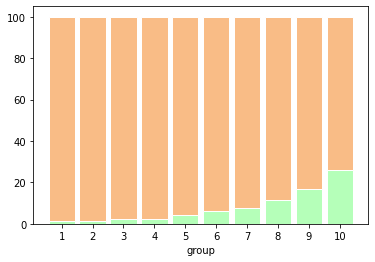

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# Data
r = [0,1,2,3,4, 5, 6, 7, 8, 9]

 
# From raw value to percentage
totals = [i+j for i,j in zip(decile_NN['event'], decile_NN['not_event'])]
greenBars = [i / j * 100 for i,j in zip(decile_NN['event'], totals)]
orangeBars = [i / j * 100 for i,j in zip(decile_NN['not_event'], totals)]
 
# plot
barWidth = 0.85
names = ('1','2','3','4','5', '6', '7', '8', '9', '10')
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")
 
# Show graphic
plt.show()


## LightGBM

In [ ]:
#dtree = LGBMClassifier(max_depth = 2, min_samples_split=100, min_data_in_leaf = 250,n_estimators=300,
#                            min_impurity_decrease=1e-03, lambda_l1=0.3,
#                       lambda_l2=0.7, random_state=11235, eta = 0.005)

In [ ]:
###GRID SEARCH LGBM ---> NAO RODAR SEMPRE

list_i = [2, 4, 6]
list_j = [50, 100, 200]
list_k = [200, 300, 400]
list_l = [100, 200, 300]

for i in list_i:
    for j in list_j:
        for k in list_k:
            for l in list_l:
                dtree = LGBMClassifier(max_depth = i, min_samples_split=j, min_data_in_leaf = k,n_estimators=l,
                            min_impurity_decrease=1e-03, lambda_l1=0.3, lambda_l2=0.7, random_state=11235, eta = 0.005)
                class_tree = dtree.fit(X_train, y_train)
                auc_valid = metrics_sk.roc_auc_score(y_valid, class_tree.predict_proba(X_valid)[:,1])
                print('depth: ', i, 'samples_split: ', j, 'data_in_leaf: ', k, 'n_estimators: ', l, 'auc_valid: ', auc_valid)

In [37]:
dtree = LGBMClassifier(max_depth = 4, min_samples_split=50, min_data_in_leaf = 400,n_estimators=300,
                            min_impurity_decrease=1e-03, lambda_l1=0.3,
                       lambda_l2=0.7, random_state=11235, eta = 0.005)

In [38]:
class_tree = dtree.fit(X, y)

In [39]:
acc_valid = metrics_sk.accuracy_score(y_valid, class_tree.predict(X_valid))
f1_valid = metrics_sk.f1_score(y_valid, class_tree.predict(X_valid))
precision_valid = metrics_sk.precision_score(y_valid, class_tree.predict(X_valid))
recall_valid = metrics_sk.recall_score(y_valid, class_tree.predict(X_valid))
auc_valid = metrics_sk.roc_auc_score(y_valid, class_tree.predict_proba(X_valid)[:,1])

print('accuracy_valid: ',acc_valid)
print('precision_valid: ',precision_valid)
print('recall_valid: ',recall_valid)
print('F1_valid: ',f1_valid)
print('AUC_valid: ',auc_valid)

accuracy_valid:  0.92027
precision_valid:  0.5771812080536913
recall_valid:  0.042653440793552384
F1_valid:  0.07943655467036138
AUC_valid:  0.7832040285882189


In [40]:
acc_test_final = metrics_sk.accuracy_score(y_test_final, (class_tree.predict(X_test_final)))
f1_test_final = metrics_sk.f1_score(y_test_final, (class_tree.predict(X_test_final)))
precision_test_final = metrics_sk.precision_score(y_test_final, (class_tree.predict(X_test_final)))
recall_test_final = metrics_sk.recall_score(y_test_final, (class_tree.predict(X_test_final)))
auc_test_final = metrics_sk.roc_auc_score(y_test_final, class_tree.predict_proba(X_test_final)[:,1])

print('accuracy_test_final: ',acc_test_final)
print('precision_test_final: ',precision_test_final)
print('recall_test_final: ',recall_test_final)
print('F1_test_final: ',f1_test_final)
print('AUC_test_final: ',auc_test_final)

accuracy_test_final:  0.9199840234322993
precision_test_final:  0.5121951219512195
recall_test_final:  0.03488372093023256
F1_test_final:  0.06531881804043546
AUC_test_final:  0.7819806511704844


In [41]:
df_class_tree_test_final = pd.DataFrame()
df_class_tree_test_final['score'] = class_tree.predict_proba(X_test_final)[:,1].ravel()
df_class_tree_test_final['y_target'] = np.array(y_test_final)
df_class_tree_test_final['decile'] = pd.qcut(df_class_tree_test_final['score'], q = 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])



In [42]:
decile_class_tree = pd.DataFrame()
decile_class_tree['event'] = df_class_tree_test_final[df_class_tree_test_final['y_target']==1].groupby(['decile'])['y_target'].count()
decile_class_tree['not_event'] = df_class_tree_test_final[df_class_tree_test_final['y_target']==0].groupby(['decile'])['y_target'].count()
decile_class_tree['bad_rate'] = (decile_class_tree['event']/(decile_class_tree['event']+decile_class_tree['not_event'])).round(4)

In [43]:
decile_class_tree

,event,not_event,bad_rate
decile,,,
1,5,747,0.0066
2,15,736,0.0200
3,22,729,0.0293
4,18,733,0.0240
5,21,730,0.0280
6,46,705,0.0613
7,55,696,0.0732
8,92,659,0.1225
9,122,629,0.1625


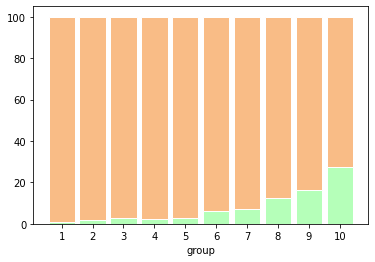

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# Data
r = [0,1,2,3,4, 5, 6, 7, 8, 9]

 
# From raw value to percentage
totals = [i+j for i,j in zip(decile_class_tree['event'], decile_class_tree['not_event'])]
greenBars = [i / j * 100 for i,j in zip(decile_class_tree['event'], totals)]
orangeBars = [i / j * 100 for i,j in zip(decile_class_tree['not_event'], totals)]
 
# plot
barWidth = 0.85
names = ('1','2','3','4','5', '6', '7', '8', '9', '10')
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")
 
# Show graphic
plt.show()

## Stacking NN+LGBM

In [45]:
pred_nn = NN_Model.predict(X_valid)
pred_lgbm = class_tree.predict_proba(X_valid)[:,1].reshape(-1, 1)


In [46]:
X_stack = np.zeros((pred_nn.shape[0], 2))

In [47]:
X_stack[:,0] = pred_nn.reshape(1, -1)
X_stack[:,1] = pred_lgbm.reshape(1, -1)
#X_stack[:,2] = pred_nn.reshape(1, -1)**2
#X_stack[:,3] = pred_lgbm.reshape(1, -1)**2
#X_stack[:,4] = pred_nn.reshape(1, -1)**3
#X_stack[:,5] = pred_lgbm.reshape(1, -1)**3

In [48]:
class_weight = {0: 1/(y_valid==0).sum(), 1: 1/(y_valid==1).sum()}

In [49]:
lr = LogisticRegression()#class_weight=class_weight

In [50]:
from sklearn.naive_bayes import GaussianNB

In [51]:
nb = GaussianNB(var_smoothing = 0.01)

In [52]:
lr_ = lr.fit(X_stack, y_valid)

In [53]:
nb_ = nb.fit(X_stack, y_valid)

## Validação - supervisor logistico

In [54]:
acc_stack = metrics_sk.accuracy_score(y_valid, lr_.predict(X_stack))
f1_stack = metrics_sk.f1_score(y_valid, lr_.predict(X_stack))
precision_stack = metrics_sk.precision_score(y_valid, lr_.predict(X_stack))
recall_stack = metrics_sk.recall_score(y_valid, lr_.predict(X_stack))
auc_stack = metrics_sk.roc_auc_score(y_valid, lr_.predict_proba(X_stack)[:,1])

print('accuracy_stack: ',acc_stack)
print('precision_stack: ',precision_stack)
print('recall_stack: ',recall_stack)
print('F1_stack: ',f1_stack)
print('AUC_stack: ',auc_stack)

accuracy_stack:  0.92
precision_stack:  0.5397796817625459
recall_stack:  0.05468071915685059
F1_stack:  0.09930195901823914
AUC_stack:  0.7784625617084174


## Validação - supervisor Naive Bayes

In [55]:
acc_stack = metrics_sk.accuracy_score(y_valid, nb_.predict(X_stack))
f1_stack = metrics_sk.f1_score(y_valid, nb_.predict(X_stack))
precision_stack = metrics_sk.precision_score(y_valid, nb_.predict(X_stack))
recall_stack = metrics_sk.recall_score(y_valid, nb_.predict(X_stack))
auc_stack = metrics_sk.roc_auc_score(y_valid, nb_.predict_proba(X_stack)[:,1])

print('accuracy_stack: ',acc_stack)
print('precision_stack: ',precision_stack)
print('recall_stack: ',recall_stack)
print('F1_stack: ',f1_stack)
print('AUC_stack: ',auc_stack)

accuracy_stack:  0.89366
precision_stack:  0.32478515891419996
recall_stack:  0.2952262864228146
F1_stack:  0.30930111717329173
AUC_stack:  0.7777205565632016


In [56]:
pred_nn_final = NN_Model.predict(X_test_final)
pred_lgbm_final = class_tree.predict_proba(X_test_final)[:,1].reshape(-1, 1)

In [57]:
X_stack_final = np.zeros((pred_nn_final.shape[0], 2))

In [58]:
X_stack_final[:,0] = pred_nn_final.reshape(1, -1)
X_stack_final[:,1] = pred_lgbm_final.reshape(1, -1)
#X_stack_final[:,2] = pred_nn_final.reshape(1, -1)**2
#X_stack_final[:,3] = pred_lgbm_final.reshape(1, -1)**2
#X_stack_final[:,4] = pred_nn_final.reshape(1, -1)**3
#X_stack_final[:,5] = pred_lgbm_final.reshape(1, -1)**3

## Teste final - supervisor Naive Bayes

In [59]:
acc_stack = metrics_sk.accuracy_score(y_test_final, nb_.predict(X_stack_final))
f1_stack = metrics_sk.f1_score(y_test_final, nb_.predict(X_stack_final))
precision_stack = metrics_sk.precision_score(y_test_final, nb_.predict(X_stack_final))
recall_stack = metrics_sk.recall_score(y_test_final, nb_.predict(X_stack_final))
auc_stack = metrics_sk.roc_auc_score(y_test_final, nb_.predict_proba(X_stack_final)[:,1])

print('accuracy_stack: ',acc_stack)
print('precision_stack: ',precision_stack)
print('recall_stack: ',recall_stack)
print('F1_stack: ',f1_stack)
print('AUC_stack: ',auc_stack)

accuracy_stack:  0.8901610970576488
precision_stack:  0.2998204667863555
recall_stack:  0.27740863787375414
F1_stack:  0.2881794650560828
AUC_stack:  0.7760742524195654


## Teste final - supervisor logístico

In [60]:
acc_stack = metrics_sk.accuracy_score(y_test_final, lr_.predict(X_stack_final))
f1_stack = metrics_sk.f1_score(y_test_final, lr_.predict(X_stack_final))
precision_stack = metrics_sk.precision_score(y_test_final, lr_.predict(X_stack_final))
recall_stack = metrics_sk.recall_score(y_test_final, lr_.predict(X_stack_final))
auc_stack = metrics_sk.roc_auc_score(y_test_final, lr_.predict_proba(X_stack_final)[:,1])

print('accuracy_stack: ',acc_stack)
print('precision_stack: ',precision_stack)
print('recall_stack: ',recall_stack)
print('F1_stack: ',f1_stack)
print('AUC_stack: ',auc_stack)

accuracy_stack:  0.918918918918919
precision_stack:  0.4444444444444444
recall_stack:  0.046511627906976744
F1_stack:  0.08421052631578947
AUC_stack:  0.7769715364763281


# Optimizing F1 Score

In [61]:
#### optimizing f1 score
X_opt = np.zeros((X_stack.shape[0], 4))

In [62]:
X_opt[:,0] = 1
X_opt[:,1:3]=X_stack
X_opt[:,3] = y_valid

In [ ]:
#def sigmoid(x): resulta em overflow essa merda
#    return 1/(1+np.exp(-x))

In [63]:
def sigmoid(x): ##corrigido
    if x.all()>=0:
        z = np.exp(-x)
        return 1/(1+z)
    else:
        z = np.exp(-x)
        return z/(1+z)

In [64]:
def sigmoid1(x): ##derivada
    return sigmoid(x)*(1-sigmoid(x))

In [65]:
alpha = 0.25 ##obtive via grid search 
gamma = 2

In [66]:
def f(theta, alpha = alpha,X_opt = X_opt, gamma = gamma):
    A = np.sum(sigmoid(gamma*np.dot(X_opt[X_opt[:,3]==1,:3], theta)))
    npos = X_opt[:,3].sum()
    mpos = np.sum(sigmoid(gamma*np.dot(X_opt[:,:3], theta)))
    F = A/(alpha*npos +(1-alpha)*mpos)
    return -F

In [67]:
def logf(theta, alpha = alpha,X_opt = X_opt, gamma = gamma):
    A = np.sum(sigmoid(gamma*np.dot(X_opt[X_opt[:,3]==1,:3], theta)))
    npos = X_opt[:,3].sum()
    mpos = np.sum(sigmoid(gamma*np.dot(X_opt[:,:3], theta)))
    logF = np.log(A) - np.log((alpha*npos +(1-alpha)*mpos))
    return -logF.round(3)

In [69]:
def df(theta, alpha = alpha,X_opt = X_opt, gamma = gamma):
    A = np.sum(sigmoid(gamma*np.dot(X_opt[X_opt[:,3]==1,:3], theta)))
    npos = X_opt[:,3].sum()
    mpos = np.sum(sigmoid(gamma*np.dot(X_opt[:,:3], theta)))
    h = 1/(alpha*npos + (1-alpha)*mpos)
    dF=np.zeros((theta.shape))
    dA = np.zeros((theta.shape))
    dmpos = np.zeros((theta.shape))
    
    for j in range(X_opt.shape[1]-1):
        dA[j] = np.sum(sigmoid1(gamma*np.dot(X_opt[X_opt[:,3]==1,:3], theta))*gamma*X_opt[X_opt[:,3]==1,j])
        dmpos[j] = np.sum(sigmoid1(gamma*np.dot(X_opt[:,:3], theta))*gamma*X_opt[:,j])
        dF[j] = h*dA[j]-(h**2)*A*(1-alpha)*dmpos[j]
    return -dF
        
    

In [70]:
def dlogf(theta, alpha = alpha,X_opt = X_opt, gamma = gamma):
    A = np.sum(sigmoid(gamma*np.dot(X_opt[X_opt[:,3]==1,:3], theta)))
    npos = X_opt[:,3].sum()
    mpos = np.sum(sigmoid(gamma*np.dot(X_opt[:,:3], theta)))
    dlogF=np.zeros((theta.shape))
    dA = np.zeros((theta.shape))
    dmpos = np.zeros((theta.shape))
    
    for j in range(X_opt.shape[1]-1):
        dA[j] = np.sum(sigmoid1(gamma*np.dot(X_opt[X_opt[:,3]==1,:3], theta))*gamma*X_opt[X_opt[:,3]==1,j])
        dmpos[j] = np.sum(sigmoid1(gamma*np.dot(X_opt[:,:3], theta))*gamma*X_opt[:,j])
        dlogF[j] = (1/A)*dA[j] - (1/(alpha*npos + (1-alpha)*mpos))*(1-alpha)*dmpos[j]
    return -dlogF.round(3)

In [71]:
from scipy import optimize

In [72]:
def predict_opt(X, theta_opt):
    score = sigmoid(np.dot(X[:,:-1], theta_opt))
    predict = (score>0.5).astype(int)
    return (score, predict)

In [74]:
##GRID SEARCH + RANDOM INITIALIZATION --> nao rodar sempre
np.random.seed(42)
#theta_matrix = np.random.normal(loc=0.0, scale=20.0, size=(150, 3)).round(3)
theta_matrix = np.random.randint(low=-30, high=30, size=(200, 3))

list_alpha = [0.25, 0.5] 
list_gamma = [2, 4]

lista_alpha = []
lista_gamma = []
lista_theta = []
lista_theta_opt = []
lista_auc = []
lista_precision = []
lista_recall = []
lista_f1 = []

for i in range(len(list_alpha)):
    for j in range(len(list_gamma)):
        for k in range(theta_matrix.shape[0]):
            
            alpha = list_alpha[i]
            gamma = list_gamma[j]
            theta = theta_matrix[k,:].T
            theta_opt = optimize.minimize(logf, theta, jac = dlogf, method = 'bfgs').x
            #theta_opt,k = bfgs_method(f, df, theta, maxiter = None, epsi = 0.0001)
            score, predicted = predict_opt(X_opt, theta_opt)
            print('alpha = ', alpha, 'gamma = ', gamma, 'theta_init = ', theta,
                  'theta_opt = ', theta_opt,
                  'AUC = ', metrics_sk.roc_auc_score(y_valid, score),
                  'precision = ', metrics_sk.precision_score(y_valid, predicted),
                  'recall = ', metrics_sk.recall_score(y_valid, predicted),
                  'F1 = ', metrics_sk.f1_score(y_valid, predicted))
            lista_alpha.append(alpha)
            lista_gamma.append(gamma)
            lista_theta.append(theta)
            lista_theta_opt.append(theta_opt)
            lista_auc.append(metrics_sk.roc_auc_score(y_valid, score))
            lista_precision.append(metrics_sk.precision_score(y_valid, predicted))
            lista_recall.append(metrics_sk.recall_score(y_valid, predicted))
            lista_f1.append(metrics_sk.f1_score(y_valid, predicted))

alpha =  0.25 gamma =  2 theta_init =  [ 8 21 -2] theta_opt =  [ 8. 21. -2.] AUC =  0.7687748389308857 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [-16  12 -23] theta_opt =  [  0.83450774  24.75213961 -21.03877985] AUC =  0.7319048475952594 precision =  0.08065564589521267 recall =  1.0 F1 =  0.1492716874271225
alpha =  0.25 gamma =  2 theta_init =  [-10   8  27] theta_opt =  [-11.78605521   6.77080746  26.71959365] AUC =  0.7817325800719538 precision =  0.3425639354943802 recall =  0.2607563546187229 F1 =  0.2961137707687975
alpha =  0.25 gamma =  2 theta_init =  [-12  -8 -20] theta_opt =  [ 19.40702243  -3.95682698 -19.1968243 ] AUC =  0.21778848509204746 precision =  0.08063322532901317 recall =  0.9997520148791073 F1 =  0.1492305272022284
alpha =  0.25 gamma =  2 theta_init =  [-20  -7  22] theta_opt =  [-9.71300862  2.87037328 30.20173175] AUC =  0.7833466399260293 precision =  0.3468400867100217 recall =  0.2579045257284563 

alpha =  0.25 gamma =  2 theta_init =  [ -7 -30  13] theta_opt =  [ 32.69941355 -27.32757986  13.93226825] AUC =  0.24415973832019852 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [-23  -7 -20] theta_opt =  [ 62.23064201   3.18506172 -18.50846376] AUC =  0.5 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [ 20 -14 -23] theta_opt =  [ 25.52026133  -9.3259375  -21.08201738] AUC =  0.21988698651649183 precision =  0.08061483689021341 recall =  0.9995040297582145 F1 =  0.14919627240674077
alpha =  0.25 gamma =  2 theta_init =  [4 4 2] theta_opt =  [4. 4. 2.] AUC =  0.7748820851789844 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [ 28 -26  11] theta_opt =  [ 28. -26.  11.] AUC =  0.2403130375510259 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [ 8 27 10] theta_opt =  [ 8. 27. 10.]

alpha =  0.25 gamma =  2 theta_init =  [ 18  25 -14] theta_opt =  [ 18.  25. -14.] AUC =  0.7532942628978782 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [ 28  18 -29] theta_opt =  [ 28.  18. -29.] AUC =  0.6189477909184806 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [-29  -3  23] theta_opt =  [-15.77562636   9.77474494  33.57288672] AUC =  0.7813728661024995 precision =  0.34227206240858116 recall =  0.261128332300062 F1 =  0.2962441974961316
alpha =  0.25 gamma =  2 theta_init =  [-8  6  1] theta_opt =  [-25.34104487  19.84183469  38.11801074] AUC =  0.7795637480873354 precision =  0.35151734104046245 recall =  0.24128952262864228 F1 =  0.28615542974781266
alpha =  0.25 gamma =  2 theta_init =  [  2 -30 -12] theta_opt =  [ 35.2377217  -26.38560958 -11.1249835 ] AUC =  0.22562641446821288 precision =  0.08064080640806408 recall =  0.9998760074395536 F1 =  0.14924489191590168


alpha =  0.25 gamma =  2 theta_init =  [-13 -29  23] theta_opt =  [ 20.27975206 -27.00880404  23.78245587] AUC =  0.27113209415625633 precision =  0.08063661008132683 recall =  0.9995040297582145 F1 =  0.14923356042654023
alpha =  0.25 gamma =  2 theta_init =  [  4 -15  10] theta_opt =  [ 11.79475971 -11.95410094  10.73200058] AUC =  0.27291456594292485 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [  5   2 -27] theta_opt =  [ 13.45964047   8.26169646 -24.89595684] AUC =  0.4208228919654715 precision =  0.08065080650806508 recall =  1.0 F1 =  0.14926339946698253
alpha =  0.25 gamma =  2 theta_init =  [  2 -17 -10] theta_opt =  [ 20.86771555 -13.43552324  -9.29035157] AUC =  0.22406998111249454 precision =  0.08064080640806408 recall =  0.9998760074395536 F1 =  0.14924489191590168
alpha =  0.25 gamma =  2 theta_init =  [ 17 -11  25] theta_opt =  [ 17. -11.  25.] AUC =  0.48802545775572387 precision =  0.08065 recall =  1.0 F1 =  0.14

C:\Anaconda3\envs\benedito_deep\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\envs\benedito_deep\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


alpha =  0.25 gamma =  2 theta_init =  [-23  15 -15] theta_opt =  [-277.50391868  201.63303349  483.64128698] AUC =  0.7798724172051933 precision =  0.3451656524678837 recall =  0.2531928084314941 F1 =  0.2921107216937272
alpha =  0.25 gamma =  2 theta_init =  [-17 -19  20] theta_opt =  [ 13.35417279 -15.86644898  21.38948117] AUC =  0.3362825018120602 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [ -8 -16  -3] theta_opt =  [ 16.60654909 -14.1058129   -2.47880659] AUC =  0.22763718982430203 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [  3 -29   1] theta_opt =  [ 56.23714122 -21.74136217   2.75813449] AUC =  0.49783015042266004 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [-8 -9 20] theta_opt =  [-2.75621637 -4.48705848 22.84307473] AUC =  0.7108750403892936 precision =  0.36289166496006553 recall =  0.21971481711097335 F1 =

alpha =  0.25 gamma =  4 theta_init =  [-4 28 11] theta_opt =  [-22.61222998  25.33763957  10.55814224] AUC =  0.774342106917975 precision =  0.3317414293024049 recall =  0.2411655300681959 F1 =  0.27929350947731185
alpha =  0.25 gamma =  4 theta_init =  [ -3  29 -15] theta_opt =  [-15.617  27.636 -15.341] AUC =  0.7535296734319723 precision =  0.21229288499025342 recall =  0.4321140731556107 F1 =  0.2847105918875863
alpha =  0.25 gamma =  4 theta_init =  [-16  16  20] theta_opt =  [-16.88270179  15.31566675  19.8807184 ] AUC =  0.7781743031133582 precision =  0.341034655951783 recall =  0.25257284562926224 F1 =  0.29021228095170254
alpha =  0.25 gamma =  4 theta_init =  [13 24 21] theta_opt =  [13. 24. 21.] AUC =  0.775283206877713 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [ 26 -28   6] theta_opt =  [ 26. -28.   6.] AUC =  0.23369901933800433 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 

alpha =  0.25 gamma =  4 theta_init =  [ 16 -17 -28] theta_opt =  [ 30.20975889  -7.3229225  -25.6515186 ] AUC =  0.21857319271672002 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [-30 -26  -5] theta_opt =  [ 55.75092916 -22.05545726  -3.79948699] AUC =  0.4186316385491772 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [ 24 -17   8] theta_opt =  [ 24. -17.   8.] AUC =  0.24232834925319718 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [ -4 -22 -16] theta_opt =  [ 35.56816226 -18.49881367 -15.20530708] AUC =  0.22348015968990195 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [-16  -5  11] theta_opt =  [-7.37174763  3.68179555 17.88424222] AUC =  0.7822138103921303 precision =  0.3484664702824467 recall =  0.24934903905765654 F1 =  0.2906909511419486
alpha =  0.25 gamma =  4 the

alpha =  0.25 gamma =  4 theta_init =  [-20  17 -15] theta_opt =  [-13.28567722  23.58377863 -13.52421553] AUC =  0.7525303892872099 precision =  0.21176325827488618 recall =  0.42678239305641663 F1 =  0.28307084995271187
alpha =  0.25 gamma =  4 theta_init =  [  2 -22  29] theta_opt =  [  7.34600941 -14.02523297  34.40729267] AUC =  0.5131420279247269 precision =  0.08065066089014582 recall =  0.9971481711097334 F1 =  0.14923129737704005
alpha =  0.25 gamma =  4 theta_init =  [ 28 -25 -15] theta_opt =  [ 32.92271602 -20.74015825 -12.97388972] AUC =  0.22440650961279518 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [ -2 -28 -11] theta_opt =  [ 34.60508821 -24.82767973 -10.24139858] AUC =  0.22568577808973167 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [29 28  5] theta_opt =  [29. 28.  5.] AUC =  0.6424656298617406 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alp

alpha =  0.25 gamma =  4 theta_init =  [ -4   3 -10] theta_opt =  [-317.51084531  332.47006857  171.41548795] AUC =  0.7748850765913854 precision =  0.36707706338349294 recall =  0.1996280223186609 F1 =  0.2586137659625733
alpha =  0.25 gamma =  4 theta_init =  [-1  2 -3] theta_opt =  [-35.49863797  38.17088406  19.67746532] AUC =  0.7749757279859342 precision =  0.3442063341551299 recall =  0.2250464972101674 F1 =  0.2721547458389563
alpha =  0.25 gamma =  4 theta_init =  [ 16   2 -26] theta_opt =  [ 16.   2. -26.] AUC =  0.22431540303263536 precision =  0.08029576858809521 recall =  0.9950402975821451 F1 =  0.1486001036960225
alpha =  0.25 gamma =  4 theta_init =  [ 29  17 -12] theta_opt =  [ 29.  17. -12.] AUC =  0.7348493070945465 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [-27   4  18] theta_opt =  [-17.12407353  13.57202422  25.89273896] AUC =  0.7795402079105797 precision =  0.3460207612456747 recall =  0.24798512089274644

C:\Anaconda3\envs\benedito_deep\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\envs\benedito_deep\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


alpha =  0.25 gamma =  4 theta_init =  [-23  15 -15] theta_opt =  [-277.50391868  201.63303349  483.64128698] AUC =  0.7798724172051933 precision =  0.3451656524678837 recall =  0.2531928084314941 F1 =  0.2921107216937272
alpha =  0.25 gamma =  4 theta_init =  [-17 -19  20] theta_opt =  [ 13.35417279 -15.86644898  21.38948117] AUC =  0.3362825018120602 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [ -8 -16  -3] theta_opt =  [ 16.60654909 -14.1058129   -2.47880659] AUC =  0.22763718982430203 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [  3 -29   1] theta_opt =  [ 56.23714122 -21.74136217   2.75813449] AUC =  0.49783015042266004 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [-8 -9 20] theta_opt =  [-2.75621637 -4.48705848 22.84307473] AUC =  0.7108750403892936 precision =  0.36289166496006553 recall =  0.21971481711097335 F1 =

alpha =  0.5 gamma =  2 theta_init =  [-4 28 11] theta_opt =  [-22.61222998  25.33763957  10.55814224] AUC =  0.774342106917975 precision =  0.3317414293024049 recall =  0.2411655300681959 F1 =  0.27929350947731185
alpha =  0.5 gamma =  2 theta_init =  [ -3  29 -15] theta_opt =  [-15.617  27.636 -15.341] AUC =  0.7535296734319723 precision =  0.21229288499025342 recall =  0.4321140731556107 F1 =  0.2847105918875863
alpha =  0.5 gamma =  2 theta_init =  [-16  16  20] theta_opt =  [-16.88270179  15.31566675  19.8807184 ] AUC =  0.7781743031133582 precision =  0.341034655951783 recall =  0.25257284562926224 F1 =  0.29021228095170254
alpha =  0.5 gamma =  2 theta_init =  [13 24 21] theta_opt =  [13. 24. 21.] AUC =  0.775283206877713 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [ 26 -28   6] theta_opt =  [ 26. -28.   6.] AUC =  0.23369901933800433 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_

alpha =  0.5 gamma =  2 theta_init =  [ 16 -17 -28] theta_opt =  [ 30.20975889  -7.3229225  -25.6515186 ] AUC =  0.21857319271672002 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [-30 -26  -5] theta_opt =  [ 55.75092916 -22.05545726  -3.79948699] AUC =  0.4186316385491772 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [ 24 -17   8] theta_opt =  [ 24. -17.   8.] AUC =  0.24232834925319718 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [ -4 -22 -16] theta_opt =  [ 35.56816226 -18.49881367 -15.20530708] AUC =  0.22348015968990195 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [-16  -5  11] theta_opt =  [-7.37174763  3.68179555 17.88424222] AUC =  0.7822138103921303 precision =  0.3484664702824467 recall =  0.24934903905765654 F1 =  0.2906909511419486
alpha =  0.5 gamma =  2 theta_ini

alpha =  0.5 gamma =  2 theta_init =  [-20  17 -15] theta_opt =  [-13.28567722  23.58377863 -13.52421553] AUC =  0.7525303892872099 precision =  0.21176325827488618 recall =  0.42678239305641663 F1 =  0.28307084995271187
alpha =  0.5 gamma =  2 theta_init =  [  2 -22  29] theta_opt =  [  7.34600941 -14.02523297  34.40729267] AUC =  0.5131420279247269 precision =  0.08065066089014582 recall =  0.9971481711097334 F1 =  0.14923129737704005
alpha =  0.5 gamma =  2 theta_init =  [ 28 -25 -15] theta_opt =  [ 32.92271602 -20.74015825 -12.97388972] AUC =  0.22440650961279518 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [ -2 -28 -11] theta_opt =  [ 34.60508821 -24.82767973 -10.24139858] AUC =  0.22568577808973167 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [29 28  5] theta_opt =  [29. 28.  5.] AUC =  0.6424656298617406 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha = 

alpha =  0.5 gamma =  2 theta_init =  [ -4   3 -10] theta_opt =  [-317.51084531  332.47006857  171.41548795] AUC =  0.7748850765913854 precision =  0.36707706338349294 recall =  0.1996280223186609 F1 =  0.2586137659625733
alpha =  0.5 gamma =  2 theta_init =  [-1  2 -3] theta_opt =  [-35.49863797  38.17088406  19.67746532] AUC =  0.7749757279859342 precision =  0.3442063341551299 recall =  0.2250464972101674 F1 =  0.2721547458389563
alpha =  0.5 gamma =  2 theta_init =  [ 16   2 -26] theta_opt =  [ 16.   2. -26.] AUC =  0.22431540303263536 precision =  0.08029576858809521 recall =  0.9950402975821451 F1 =  0.1486001036960225
alpha =  0.5 gamma =  2 theta_init =  [ 29  17 -12] theta_opt =  [ 29.  17. -12.] AUC =  0.7348493070945465 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [-27   4  18] theta_opt =  [-17.12407353  13.57202422  25.89273896] AUC =  0.7795402079105797 precision =  0.3460207612456747 recall =  0.24798512089274644 F1 =

C:\Anaconda3\envs\benedito_deep\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\envs\benedito_deep\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


alpha =  0.5 gamma =  2 theta_init =  [-23  15 -15] theta_opt =  [-277.50391868  201.63303349  483.64128698] AUC =  0.7798724172051933 precision =  0.3451656524678837 recall =  0.2531928084314941 F1 =  0.2921107216937272
alpha =  0.5 gamma =  2 theta_init =  [-17 -19  20] theta_opt =  [ 13.35417279 -15.86644898  21.38948117] AUC =  0.3362825018120602 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [ -8 -16  -3] theta_opt =  [ 16.60654909 -14.1058129   -2.47880659] AUC =  0.22763718982430203 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [  3 -29   1] theta_opt =  [ 56.23714122 -21.74136217   2.75813449] AUC =  0.49783015042266004 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [-8 -9 20] theta_opt =  [-2.75621637 -4.48705848 22.84307473] AUC =  0.7108750403892936 precision =  0.36289166496006553 recall =  0.21971481711097335 F1 =  0.2

alpha =  0.5 gamma =  4 theta_init =  [-4 28 11] theta_opt =  [-22.61222998  25.33763957  10.55814224] AUC =  0.774342106917975 precision =  0.3317414293024049 recall =  0.2411655300681959 F1 =  0.27929350947731185
alpha =  0.5 gamma =  4 theta_init =  [ -3  29 -15] theta_opt =  [-15.617  27.636 -15.341] AUC =  0.7535296734319723 precision =  0.21229288499025342 recall =  0.4321140731556107 F1 =  0.2847105918875863
alpha =  0.5 gamma =  4 theta_init =  [-16  16  20] theta_opt =  [-16.88270179  15.31566675  19.8807184 ] AUC =  0.7781743031133582 precision =  0.341034655951783 recall =  0.25257284562926224 F1 =  0.29021228095170254
alpha =  0.5 gamma =  4 theta_init =  [13 24 21] theta_opt =  [13. 24. 21.] AUC =  0.775283206877713 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [ 26 -28   6] theta_opt =  [ 26. -28.   6.] AUC =  0.23369901933800433 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_

alpha =  0.5 gamma =  4 theta_init =  [ 16 -17 -28] theta_opt =  [ 30.20975889  -7.3229225  -25.6515186 ] AUC =  0.21857319271672002 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [-30 -26  -5] theta_opt =  [ 55.75092916 -22.05545726  -3.79948699] AUC =  0.4186316385491772 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [ 24 -17   8] theta_opt =  [ 24. -17.   8.] AUC =  0.24232834925319718 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [ -4 -22 -16] theta_opt =  [ 35.56816226 -18.49881367 -15.20530708] AUC =  0.22348015968990195 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [-16  -5  11] theta_opt =  [-7.37174763  3.68179555 17.88424222] AUC =  0.7822138103921303 precision =  0.3484664702824467 recall =  0.24934903905765654 F1 =  0.2906909511419486
alpha =  0.5 gamma =  4 theta_ini

alpha =  0.5 gamma =  4 theta_init =  [-20  17 -15] theta_opt =  [-13.28567722  23.58377863 -13.52421553] AUC =  0.7525303892872099 precision =  0.21176325827488618 recall =  0.42678239305641663 F1 =  0.28307084995271187
alpha =  0.5 gamma =  4 theta_init =  [  2 -22  29] theta_opt =  [  7.34600941 -14.02523297  34.40729267] AUC =  0.5131420279247269 precision =  0.08065066089014582 recall =  0.9971481711097334 F1 =  0.14923129737704005
alpha =  0.5 gamma =  4 theta_init =  [ 28 -25 -15] theta_opt =  [ 32.92271602 -20.74015825 -12.97388972] AUC =  0.22440650961279518 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [ -2 -28 -11] theta_opt =  [ 34.60508821 -24.82767973 -10.24139858] AUC =  0.22568577808973167 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [29 28  5] theta_opt =  [29. 28.  5.] AUC =  0.6424656298617406 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha = 

alpha =  0.5 gamma =  4 theta_init =  [ -4   3 -10] theta_opt =  [-317.51084531  332.47006857  171.41548795] AUC =  0.7748850765913854 precision =  0.36707706338349294 recall =  0.1996280223186609 F1 =  0.2586137659625733
alpha =  0.5 gamma =  4 theta_init =  [-1  2 -3] theta_opt =  [-35.49863797  38.17088406  19.67746532] AUC =  0.7749757279859342 precision =  0.3442063341551299 recall =  0.2250464972101674 F1 =  0.2721547458389563
alpha =  0.5 gamma =  4 theta_init =  [ 16   2 -26] theta_opt =  [ 16.   2. -26.] AUC =  0.22431540303263536 precision =  0.08029576858809521 recall =  0.9950402975821451 F1 =  0.1486001036960225
alpha =  0.5 gamma =  4 theta_init =  [ 29  17 -12] theta_opt =  [ 29.  17. -12.] AUC =  0.7348493070945465 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [-27   4  18] theta_opt =  [-17.12407353  13.57202422  25.89273896] AUC =  0.7795402079105797 precision =  0.3460207612456747 recall =  0.24798512089274644 F1 =

C:\Anaconda3\envs\benedito_deep\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\envs\benedito_deep\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


alpha =  0.5 gamma =  4 theta_init =  [-23  15 -15] theta_opt =  [-277.50391868  201.63303349  483.64128698] AUC =  0.7798724172051933 precision =  0.3451656524678837 recall =  0.2531928084314941 F1 =  0.2921107216937272
alpha =  0.5 gamma =  4 theta_init =  [-17 -19  20] theta_opt =  [ 13.35417279 -15.86644898  21.38948117] AUC =  0.3362825018120602 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [ -8 -16  -3] theta_opt =  [ 16.60654909 -14.1058129   -2.47880659] AUC =  0.22763718982430203 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [  3 -29   1] theta_opt =  [ 56.23714122 -21.74136217   2.75813449] AUC =  0.49783015042266004 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [-8 -9 20] theta_opt =  [-2.75621637 -4.48705848 22.84307473] AUC =  0.7108750403892936 precision =  0.36289166496006553 recall =  0.21971481711097335 F1 =  0.2

In [75]:
results = pd.DataFrame()
results['alpha']=lista_alpha
results['gamma']=lista_gamma
results['theta']=lista_theta
results['theta_opt']=lista_theta_opt
results['AUC']=lista_auc
results['Precision'] = lista_precision
results['Recall'] = lista_recall
results['F1'] = lista_f1
results.to_csv("resultados_otimizacao_log_table_8.csv")

In [ ]:
#alpha =  0.25 gamma =  2 theta_init =  [-1 -4  9] theta_opt =  [-568.50174834  322.85256065 2247.08499949] AUC =  0.7829109328873998 precision =  0.2642267969778887 recall =  0.4726596404215747 F1 =  0.338964965321003
#alpha =  0.25 gamma =  2 theta_init =  [0 3 5] theta_opt =  [-431.15928105  220.73593698 1731.39766752] AUC =  0.7840137316349044 precision =  0.26989136817381093 recall =  0.45592064476131433 F1 =  0.3390658859329614
#0.1	2	[-12.902   7.228  30.761]	[-12.902   7.228  30.761]	0.7882440904853698	0.34440142942227514	0.28679479231246124	0,312969353
#0.1	2	[-21.154  16.451 -24.417]	[-89.98832355  91.3083205   81.7098475 ]	0.7784056931783964	0.3293559516963772	0.28406695598264103	0,305039611
#0.25	2	[ -5.051 -24.956  32.648]	[-11.94642079   0.16685741  50.35630243]	0.7865348206371445	0.33280689160086147	0.2874147551146931	0,308449767
#0.25	2	[-18.16  -28.246  29.313]	[-18.25223462   5.61979402  59.03788049]	0.7871950151039016	0.3361270401411557	0.28344699318040917	0,307547424

#0.25	2	[ -0.717  31.293 -52.395]	[-1968.81416686  2356.06814755  1390.76945771]	0.7442478049348258	0.2828002298410266	0.3661500309981401	0,319122494

#	0.25	2	[ -9.685  25.338 -14.153]	[-233.99079602  188.47355835  372.24989718]	0.7836955872384971	0.33852496564360973	0.2748915065096094	0,303407691

#0.25	2	[-19   8 -29]	[-155.83910967  190.17488829   98.17151583]	0.7791330501134744	0.2813565744600227	0.36825790452572843	0,318994683
#0.25	2	[-20  -7  22]	[-8.48470663  1.43889145 30.69991719]	0.7872147735311658	0.3399938987187309	0.2763794172349659	0,304903905
#0.25	2	[-22  -5  22]	[-10.98538955   5.16173794  30.62632766]	0.786705006107748	0.33062937062937064	0.2931184128952263	0,310745974

#0.25	2	[-19   8 -29]	[-88.02131493 112.91040002  38.12221675]	0.7753561869553177	0.2757167720069616	0.37321760694358336	0,317142556

#0.25	2	[-23 -19   3]	[-35.53376436   8.89669013  38.01201158]	0.7829933552004502	0.32646048109965636	0.2944823310601364	0,309647979

#0.25	2	[-19   8 -29]	[-77.01958243 101.45388842  30.90990757]	0.7735109393409202	0.26534850876464233	0.3960322380657161	0,317779325


In [76]:
alpha = 0.25
gamma = 2
theta_opt = np.array([-77.01958243, 101.45388842,  30.90990757])

In [77]:
score, predicted = predict_opt(X_opt, theta_opt)

### Performance em validação (usado para otimizar)

In [78]:
print('AUC:', metrics_sk.roc_auc_score(y_valid, score))
print('PRECISION: ', metrics_sk.precision_score(y_valid, predicted))
print('RECALL: ', metrics_sk.recall_score(y_valid, predicted))
print('F1: ', metrics_sk.f1_score(y_valid, predicted))

AUC: 0.7735109393409202
PRECISION:  0.26534850876464233
RECALL:  0.3960322380657161
F1:  0.31777932544025467


In [79]:
X_opt_final = np.zeros((X_stack_final.shape[0], 4))
X_opt_final[:,0] = 1
X_opt_final[:,1:3]=X_stack_final
X_opt_final[:,3] = y_test_final

In [80]:
score_final, predicted_final = predict_opt(X_opt_final, theta_opt)

In [81]:
X_opt_final.shape

(7511, 4)

In [82]:
X_stack_final.shape

(7511, 2)

### Performance no teste final

In [83]:
print('ACCURACY', metrics_sk.roc_auc_score(y_test_final, predicted_final))
print('AUC', metrics_sk.roc_auc_score(y_test_final, score_final))
print('PRECISION', metrics_sk.precision_score(y_test_final, predicted_final))
print('RECALL', metrics_sk.recall_score(y_test_final, predicted_final))
print('F1', metrics_sk.f1_score(y_test_final, predicted_final))

ACCURACY 0.6417463571277101
AUC 0.772095499682873
PRECISION 0.2524698133918771
RECALL 0.38205980066445183
F1 0.30403172504957043


In [84]:
df_opt_test_final = pd.DataFrame()
df_opt_test_final['score'] = score_final
df_opt_test_final['y_target'] = np.array(y_test_final)
df_opt_test_final['decile'] = pd.qcut(df_opt_test_final['score'], q = 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])



In [85]:
decile_opt = pd.DataFrame()
decile_opt['event'] = df_opt_test_final[df_opt_test_final['y_target']==1].groupby(['decile'])['y_target'].count()
decile_opt['not_event'] = df_opt_test_final[df_opt_test_final['y_target']==0].groupby(['decile'])['y_target'].count()
decile_opt['bad_rate'] = (decile_opt['event']/(decile_opt['event']+decile_opt['not_event'])).round(4)

In [86]:
decile_opt

,event,not_event,bad_rate
decile,,,
1,7,745,0.0093
2,17,734,0.0226
3,16,735,0.0213
4,26,725,0.0346
5,31,720,0.0413
6,31,720,0.0413
7,65,686,0.0866
8,83,668,0.1105
9,120,631,0.1598


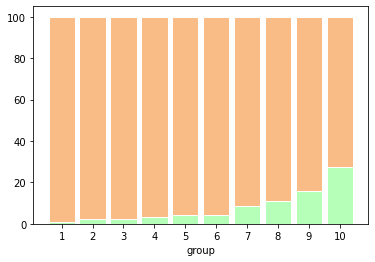

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# Data
r = [0,1,2,3,4, 5, 6, 7, 8, 9]

 
# From raw value to percentage
totals = [i+j for i,j in zip(decile_opt['event'], decile_opt['not_event'])]
greenBars = [i / j * 100 for i,j in zip(decile_opt['event'], totals)]
orangeBars = [i / j * 100 for i,j in zip(decile_opt['not_event'], totals)]
 
# plot
barWidth = 0.85
names = ('1','2','3','4','5', '6', '7', '8', '9', '10')
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")
 
# Show graphic
plt.show()

In [80]:
from eli5.permutation_importance import get_score_importances

C:\Anaconda3\envs\benedito_deep\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Anaconda3\envs\benedito_deep\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [82]:
def score(X, y):
    y_pred = NN_Model.predict(X)
    return metrics_sk.roc_auc_score(y, y_pred)

base_score, score_decreases = get_score_importances(score, X_test_final, y_test_final)
feature_importances = np.mean(score_decreases, axis=0)

In [83]:
feature_importance_dict = {}
for i, feature_name in enumerate(feats):
    feature_importance_dict[feature_name]=feature_importances[i]
print(dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:-1]))

{'mean_knn_target': 0.04147385397928174, 'SUM(previous.CNT_PAYMENT)': 0.011273609606421231, 'EXT_SOURCE_2': 0.0107817142549393, 'avg_pos_cash_cnt_installment_future_previous': 0.009114044995958425, 'remaining_pmts_monotonic': 0.008512465564440274, 'max_pos_cash_sk_dpd_def_previous': 0.005920151336140633, 'EXT_SOURCE_3': 0.005333526638901831, 'amt_paid_down': 0.00494994491753018, 'EXT_SOURCE_1': 0.004571628609031797, 'CODE_GENDER_M': 0.0030070075672879114, 'NAME_FAMILY_STATUS_Married': 0.0028596721787605083, 'cnt_appl_previous': 0.002644439411447075, 'avg_amt_credit_card_total_receivable_previous': 0.002642083199293754, 'amt_credit_sum_debt_credit_card_bureau': 0.00251845419018677, 'FLAG_OWN_CAR_Y': 0.0024660404912654867, 'SUM(previous.DAYS_FIRST_DUE)': 0.002446301203735901, 'avg_cnt_credit_card_drawings_atm_previous': 0.0024455799143011437, 'days_phone_change_over_gap_amt_installment_monotonic': 0.0023450081241233487, 'COUNT(bureau)': 0.0023102660163520916, 'SKEW(previous.DAYS_DECISION

In [84]:
dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:-1])

{'mean_knn_target': 0.04147385397928174,
 'SUM(previous.CNT_PAYMENT)': 0.011273609606421231,
 'EXT_SOURCE_2': 0.0107817142549393,
 'avg_pos_cash_cnt_installment_future_previous': 0.009114044995958425,
 'remaining_pmts_monotonic': 0.008512465564440274,
 'max_pos_cash_sk_dpd_def_previous': 0.005920151336140633,
 'EXT_SOURCE_3': 0.005333526638901831,
 'amt_paid_down': 0.00494994491753018,
 'EXT_SOURCE_1': 0.004571628609031797,
 'CODE_GENDER_M': 0.0030070075672879114,
 'NAME_FAMILY_STATUS_Married': 0.0028596721787605083,
 'cnt_appl_previous': 0.002644439411447075,
 'avg_amt_credit_card_total_receivable_previous': 0.002642083199293754,
 'amt_credit_sum_debt_credit_card_bureau': 0.00251845419018677,
 'FLAG_OWN_CAR_Y': 0.0024660404912654867,
 'SUM(previous.DAYS_FIRST_DUE)': 0.002446301203735901,
 'avg_cnt_credit_card_drawings_atm_previous': 0.0024455799143011437,
 'days_phone_change_over_gap_amt_installment_monotonic': 0.0023450081241233487,
 'COUNT(bureau)': 0.0023102660163520916,
 'SKEW(pre

In [85]:
feature_importance_dict = {}
for i, feature_name in enumerate(feats):
    feature_importance_dict[feature_name]=class_tree.feature_importances_[i]
print(dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:-1]))

{'mean_knn_target': 207, 'avg_pos_cash_cnt_installment_future_previous': 113, 'EXT_SOURCE_2': 105, 'EXT_SOURCE_1': 104, 'EXT_SOURCE_3': 83, 'amt_paid_down': 77, 'MEAN(bureau.AMT_CREDIT_SUM)': 75, 'remaining_pmts_monotonic': 74, 'MAX(bureau.DAYS_CREDIT_UPDATE)': 68, 'SUM(previous.DAYS_FIRST_DUE)': 67, 'SUM(bureau.DAYS_CREDIT_ENDDATE)': 64, 'amt_credit_sum_consumer_credit_bureau': 60, 'tot_debt_lim_ratio': 60, 'AMT_GOODS_PRICE_monotonic': 57, 'max_installments_gap_amt_payment_previous': 54, 'SKEW(previous.DAYS_DECISION)': 51, 'SKEW(bureau.DAYS_CREDIT)': 48, 'max_pos_cash_sk_dpd_def_previous': 46, 'OWN_CAR_AGE_monotonic': 46, 'STD(previous.CNT_PAYMENT)': 42, 'missing_rate_monotonic': 42, 'STD(bureau.DAYS_CREDIT)': 40, 'MEDIAN(bureau.DAYS_CREDIT_UPDATE)': 40, 'MAX(previous.DAYS_DECISION)': 38, 'DAYS_REGISTRATION_monotonic': 38, 'amt_credit_sum_debt_credit_card_bureau': 37, 'cnt_refused_previous': 37, 'MIN(bureau.DAYS_CREDIT)': 37, 'credit_income_ratio_monotonic': 37, 'gap_avg_application_c

In [86]:
dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:-1])

{'mean_knn_target': 207,
 'avg_pos_cash_cnt_installment_future_previous': 113,
 'EXT_SOURCE_2': 105,
 'EXT_SOURCE_1': 104,
 'EXT_SOURCE_3': 83,
 'amt_paid_down': 77,
 'MEAN(bureau.AMT_CREDIT_SUM)': 75,
 'remaining_pmts_monotonic': 74,
 'MAX(bureau.DAYS_CREDIT_UPDATE)': 68,
 'SUM(previous.DAYS_FIRST_DUE)': 67,
 'SUM(bureau.DAYS_CREDIT_ENDDATE)': 64,
 'amt_credit_sum_consumer_credit_bureau': 60,
 'tot_debt_lim_ratio': 60,
 'AMT_GOODS_PRICE_monotonic': 57,
 'max_installments_gap_amt_payment_previous': 54,
 'SKEW(previous.DAYS_DECISION)': 51,
 'SKEW(bureau.DAYS_CREDIT)': 48,
 'max_pos_cash_sk_dpd_def_previous': 46,
 'OWN_CAR_AGE_monotonic': 46,
 'STD(previous.CNT_PAYMENT)': 42,
 'missing_rate_monotonic': 42,
 'STD(bureau.DAYS_CREDIT)': 40,
 'MEDIAN(bureau.DAYS_CREDIT_UPDATE)': 40,
 'MAX(previous.DAYS_DECISION)': 38,
 'DAYS_REGISTRATION_monotonic': 38,
 'amt_credit_sum_debt_credit_card_bureau': 37,
 'cnt_refused_previous': 37,
 'MIN(bureau.DAYS_CREDIT)': 37,
 'credit_income_ratio_monotonic'

In [87]:
def score(X, y):
    y_pred = class_tree.predict(X)
    return metrics_sk.roc_auc_score(y, y_pred)

base_score, score_decreases = get_score_importances(score, X_test_final, y_test_final)
feature_importances = np.mean(score_decreases, axis=0)

In [88]:
feature_importance_dict = {}
for i, feature_name in enumerate(feats):
    feature_importance_dict[feature_name]=feature_importances[i]
print(dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:-1]))

{'mean_knn_target': 0.012563996405093448, 'EXT_SOURCE_2': 0.007994122933686065, 'max_installments_gap_amt_payment_previous': 0.0040439332586077684, 'MEAN(bureau.AMT_CREDIT_SUM)': 0.003993611299047006, 'FLOORSMAX_AVG_monotonic': 0.003942616136013988, 'SUM(previous.DAYS_FIRST_DRAWING)': 0.003805450928515852, 'EXT_SOURCE_3': 0.0037620293045470985, 'AMT_GOODS_PRICE_monotonic': 0.003646238307297156, 'CODE_GENDER_M': 0.003466324679302657, 'amt_paid_down': 0.003393955306021423, 'STD(bureau.DAYS_ENDDATE_FACT)': 0.0029390380595582855, 'tot_debt_lim_ratio': 0.002729503478778916, 'amt_credit_max_overdue_bureau': 0.0024117514398138916, 'max_pos_cash_sk_dpd_def_previous': 0.0022821597713800655, 'DAYS_ID_PUBLISH_monotonic': 0.00211604681456945, 'remaining_pmts_monotonic': 0.0017611002837552236, 'OWN_CAR_AGE_monotonic': 0.0016825037783544604, 'SUM(previous.AMT_GOODS_PRICE)': 0.0016680299036982316, 'MEAN(previous.AMT_CREDIT)': 0.0016177079441375807, 'EXT_SOURCE_1': 0.0014219740345420505, 'MEDIAN(burea

In [89]:
dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:-1])

{'mean_knn_target': 0.012563996405093448,
 'EXT_SOURCE_2': 0.007994122933686065,
 'max_installments_gap_amt_payment_previous': 0.0040439332586077684,
 'MEAN(bureau.AMT_CREDIT_SUM)': 0.003993611299047006,
 'FLOORSMAX_AVG_monotonic': 0.003942616136013988,
 'SUM(previous.DAYS_FIRST_DRAWING)': 0.003805450928515852,
 'EXT_SOURCE_3': 0.0037620293045470985,
 'AMT_GOODS_PRICE_monotonic': 0.003646238307297156,
 'CODE_GENDER_M': 0.003466324679302657,
 'amt_paid_down': 0.003393955306021423,
 'STD(bureau.DAYS_ENDDATE_FACT)': 0.0029390380595582855,
 'tot_debt_lim_ratio': 0.002729503478778916,
 'amt_credit_max_overdue_bureau': 0.0024117514398138916,
 'max_pos_cash_sk_dpd_def_previous': 0.0022821597713800655,
 'DAYS_ID_PUBLISH_monotonic': 0.00211604681456945,
 'remaining_pmts_monotonic': 0.0017611002837552236,
 'OWN_CAR_AGE_monotonic': 0.0016825037783544604,
 'SUM(previous.AMT_GOODS_PRICE)': 0.0016680299036982316,
 'MEAN(previous.AMT_CREDIT)': 0.0016177079441375807,
 'EXT_SOURCE_1': 0.001421974034542